In [1]:
import tensorflow as tf
import tf_slim as slim

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import itertools
import random
%matplotlib inline
np.random.seed(2)

In [2]:
def SRM(imgs):
    filter1 = [[0, 0, 0, 0, 0],
               [0, -1, 2, -1, 0],
               [0, 2, -4, 2, 0],
               [0, -1, 2, -1, 0],
               [0, 0, 0, 0, 0]]
    filter2 = [[-1, 2, -2, 2, -1],
               [2, -6, 8, -6, 2],
               [-2, 8, -12, 8, -2],
               [2, -6, 8, -6, 2],
               [-1, 2, -2, 2, -1]]
    filter3 = [[0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 1, -2, 1, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0]]
    q = [4.0, 12.0, 2.0]
    filter1 = np.asarray(filter1, dtype=float) / 4
    filter2 = np.asarray(filter2, dtype=float) / 12
    filter3 = np.asarray(filter3, dtype=float) / 2
    filters = [[filter1, filter1, filter1], [filter2, filter2, filter2], [filter3, filter3, filter3]]
    filters = np.einsum('klij->ijlk', filters)
    filters = tf.Variable(filters, dtype=tf.float32)
    imgs = np.array(imgs, dtype=float)
    input = tf.Variable(imgs, dtype=tf.float32)
    op = tf.nn.conv2d(input, filters, strides=[1, 1, 1, 1], padding='SAME')

    q = [4.0, 12.0, 2.0]
    filter1 = [[0, 0, 0, 0, 0],
            [0, -1, 2, -1, 0],
            [0, 2, -4, 2, 0],
            [0, -1, 2, -1, 0],
            [0, 0, 0, 0, 0]]
    filter2 = [[-1, 2, -2, 2, -1],
            [2, -6, 8, -6, 2],
            [-2, 8, -12, 8, -2],
            [2, -6, 8, -6, 2],
            [-1, 2, -2, 2, -1]]
    filter3 = [[0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0],
            [0, 1, -2, 1, 0],
            [0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0]]
    filter1 = np.asarray(filter1, dtype=float) / q[0]
    filter2 = np.asarray(filter2, dtype=float) / q[1]
    filter3 = np.asarray(filter3, dtype=float) / q[2]
    filters = [[filter1, filter1, filter1], [filter2, filter2, filter2], [filter3, filter3, filter3]]
    filters = np.einsum('klij->ijlk', filters)
    filters = filters.flatten()
    imgs = np.array(imgs, dtype=float)
    input = tf.Variable(imgs, dtype=tf.float32)
    initializer_srm = tf.constant_initializer(filters)
    def truncate_2(x):
        neg = ((x + 2) + abs(x + 2)) / 2 - 2
        return -(-neg+2 + abs(- neg+2)) / 2 + 2
    op2 = slim.conv2d(input, 3, [5, 5], trainable=False, weights_initializer=initializer_srm, activation_fn=None, padding='SAME', stride=1, scope='srm')
    op2 = truncate_2(op2)

    res = np.round(op[0])
    res[res > 2] = 2
    res[res < -2] = -2

    ress = np.array([res], dtype=float)
    ress2 = np.array(op2, dtype=float)
    return ress

In [6]:
h = 1000
w = 1000
image_size = (h, w)

def prepare_image(image_path):
    img = Image.open(image_path)
    img = img.resize(image_size)
    img = np.asarray(img)
    return SRM([img])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


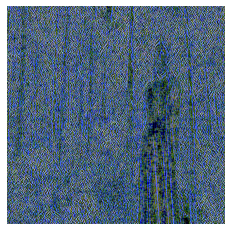

In [7]:
img_path = 'D:\Google Drive\CASIA2\Tp\Tp_D_NNN_M_N_pla10121_cha00027_11669.jpg'
# './example_images/Tp_D_CNN_S_O_nat10153_ani00097_12135.jpg'
img = prepare_image(img_path)
plt.imshow(img[0])
# plt.show()
plt.axis('off')
plt.savefig("srm.png", bbox_inches='tight', pad_inches=0)